<a href="https://colab.research.google.com/github/dionysus98/l_torch/blob/main/02_torch_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. NN classification


## 1. Data

In [2]:
import sklearn

In [21]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [7]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
len(X), len(y)

In [8]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:,1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


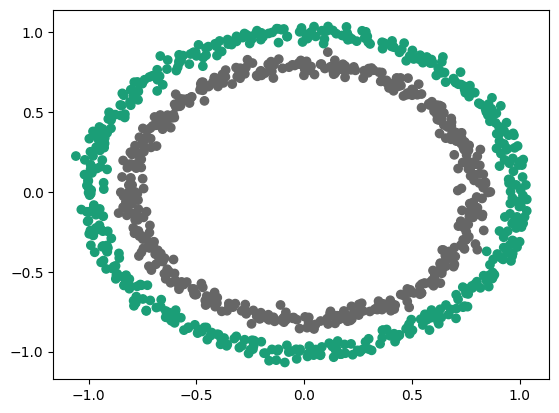

In [12]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.Dark2)

### 1.1 check input and output shapes

In [14]:
X.shape, y.shape

((1000, 2), (1000,))

In [16]:
# features and lables
X_sample = X[0]
y_sample = y[0]

X_sample, X_sample.shape, y_sample, y_sample.shape

(array([0.75424625, 0.23148074]), (2,), 1, ())

### 1.2 convert data to tensor

In [17]:
import torch
torch.__version__

'2.3.0+cu121'

In [27]:
if not type(X) == torch.Tensor:
  X = torch.from_numpy(X).type(torch.float)

if not type(y) == torch.Tensor:
  y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 torch.float32)

In [28]:
# splitting datra
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                        y,
                                        test_size=0.2,
                                        random_state=42)

In [29]:
len(X_train), len(y_train)

(800, 800)

## 2. Build a Model

In [30]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [32]:
# create a NN
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(
        in_features=2,
        out_features=5)

    self.layer_2 = nn.Linear(
        in_features=5,
        out_features=1)


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_2(self.layer_1(x))

In [36]:
model_0 = CircleModelV1().to(device)
model_0.state_dict(), next(model_0.parameters()).device

(OrderedDict([('layer_1.weight',
               tensor([[ 0.0990,  0.2178],
                       [ 0.2557, -0.0222],
                       [-0.6080, -0.3056],
                       [-0.3681,  0.0878],
                       [-0.5924, -0.1211]])),
              ('layer_1.bias',
               tensor([-0.3021, -0.3275,  0.5988,  0.5789, -0.3923])),
              ('layer_2.weight',
               tensor([[ 0.0286,  0.0259,  0.2252,  0.4270, -0.3690]])),
              ('layer_2.bias', tensor([0.3470]))]),
 device(type='cpu'))